In [ ]:
# import os
# import cv2

# dataset_path = "PlantVillage"  # your main folder

# # Just to count
# total_images = 0

# # Loop through folders and count images
# for folder in os.listdir(dataset_path):
#     folder_path = os.path.join(dataset_path, folder)
#     if os.path.isdir(folder_path):
#         num_images = len(os.listdir(folder_path))
#         total_images += num_images
#         print(f"{folder}: {num_images} images")

# print(f"\n Total images in dataset: {total_images}")


Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___healthy: 152 images
Potato___Late_blight: 1000 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_healthy: 1591 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images

 Total images in dataset: 20638


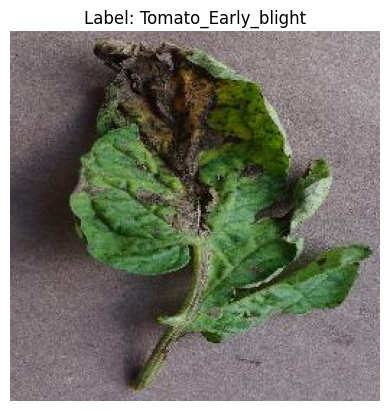

In [ ]:
# import random
# import matplotlib.pyplot as plt

# # pick random folder and image
# folder = random.choice(os.listdir(dataset_path))
# img_name = random.choice(os.listdir(os.path.join(dataset_path, folder)))
# img_path = os.path.join(dataset_path, folder, img_name)

# # read and show
# img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(img)
# plt.title(f"Label: {folder}")
# plt.axis('off')
# plt.show()


In [12]:
# import os
# import cv2
# import numpy as np

# dataset_path = "PlantVillage"
# img_size = 128

# data = []
# labels = []

# for folder in os.listdir(dataset_path):
#     folder_path = os.path.join(dataset_path, folder)
#     if not os.path.isdir(folder_path):
#         continue

#     print(f"Processing: {folder}")

#     for img_name in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, img_name)

#         # Read image safely
#         img = cv2.imread(img_path)
#         if img is None:  # skip corrupted or non-image files
#             print(f"⚠️ Skipped bad image: {img_path}")
#             continue

#         try:
#             img = cv2.resize(img, (img_size, img_size))
#         except Exception as e:
#             print(f"⚠️ Resize failed for {img_path}: {e}")
#             continue

#         data.append(img)
#         labels.append(folder)




In [13]:
# import numpy as np

# batch_size = 5000
# for i in range(0, len(data), batch_size):
#     np.save(f"plant_data_part{i//batch_size}.npy", data[i:i+batch_size])
#     np.save(f"plant_labels_part{i//batch_size}.npy", labels[i:i+batch_size])
#     print(f"✅ Saved batch {i//batch_size + 1}")


In [2]:
# Load Resized Images
import numpy as np

data = []
labels = []
for i in range(5):  # if you know you saved 5 parts
    data.append(np.load(f"plant_data_part{i}.npy", allow_pickle=True))
    labels.append(np.load(f"plant_labels_part{i}.npy", allow_pickle=True))

data = np.concatenate(data)
labels = np.concatenate(labels)
print("All data loaded back!")


All data loaded back!


In [3]:
# print(labels)
print(data[0].shape)


(128, 128, 3)


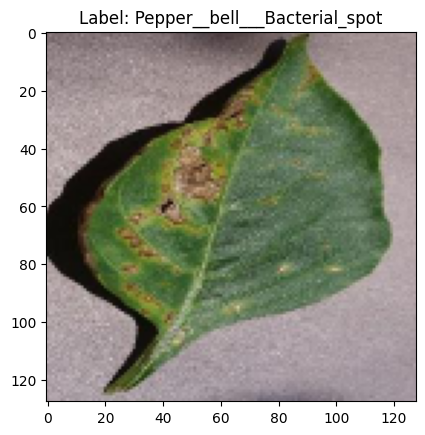

In [4]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(cv2.cvtColor(data[0], cv2.COLOR_BGR2RGB))
plt.title(f"Label: {labels[0]}")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)


In [6]:
# Flatten each image from (128, 128, 3) → (49152,)
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

print("Training data shape:", X_train_flat.shape)
print("Testing data shape:", X_test_flat.shape)


Training data shape: (16510, 49152)
Testing data shape: (4128, 49152)


In [7]:
import pandas as pd

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_flat)

# Show first 5 rows
X_train_df.head()


,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,189,168,167,190,169,168,191,170,169,190,...,124,139,119,124,138,118,123,127,107,112
1,126,124,136,127,125,137,125,123,135,125,...,178,175,171,177,173,169,175,170,166,172
2,172,150,152,174,152,154,171,149,151,176,...,104,161,140,148,125,104,112,107,86,94
3,119,79,101,124,93,114,96,72,92,103,...,104,131,112,127,128,109,124,110,93,107
4,182,168,174,185,171,177,185,171,177,184,...,160,145,139,150,151,145,156,140,134,145


# These are showing error / as more storage unable to keep in RAM 8GB, 3GB, that is why shift to batches
import numpy as np

X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

print("After normalization:")
print(X_train_flat[0][:10])  # show first 10 pixel values of 1st image



X_train_flat = X_train_flat.astype(np.float32) / 255.0
X_test_flat = X_test_flat.astype(np.float32) / 255.0

print("After normalization (float32):")
print(X_train_flat[0][:10])
print(X_train_flat.dtype)  # should show float32


In [ ]:
# # Normalize safely (convert to float32 first to reduce memory)
# X_train_flat = X_train_flat.astype(np.float32) / 255.0
# X_test_flat = X_test_flat.astype(np.float32) / 255.0

# # Save normalized data
# np.save("X_train_flat_norm.npy", X_train_flat)
# np.save("X_test_flat_norm.npy", X_test_flat)

# print("✅ Normalized data saved successfully to disk!")


✅ Normalized data saved successfully to disk!


In [8]:
# Load normalized data from .npy files
X_train_flat = np.load("X_train_flat_norm.npy")
X_test_flat = np.load("X_test_flat_norm.npy")



In [9]:
# Convert to DataFrame (for visualization)
X_train_df = pd.DataFrame(X_train_flat)

# Show first 5 rows (each row = one image’s flattened pixels)
X_train_df.head()


,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.741176,0.658824,0.654902,0.745098,0.662745,0.658824,0.749020,0.666667,0.662745,0.745098,...,0.486275,0.545098,0.466667,0.486275,0.541176,0.462745,0.482353,0.498039,0.419608,0.439216
1,0.494118,0.486275,0.533333,0.498039,0.490196,0.537255,0.490196,0.482353,0.529412,0.490196,...,0.698039,0.686275,0.670588,0.694118,0.678431,0.662745,0.686275,0.666667,0.650980,0.674510
2,0.674510,0.588235,0.596078,0.682353,0.596078,0.603922,0.670588,0.584314,0.592157,0.690196,...,0.407843,0.631373,0.549020,0.580392,0.490196,0.407843,0.439216,0.419608,0.337255,0.368627
3,0.466667,0.309804,0.396078,0.486275,0.364706,0.447059,0.376471,0.282353,0.360784,0.403922,...,0.407843,0.513726,0.439216,0.498039,0.501961,0.427451,0.486275,0.431373,0.364706,0.419608
4,0.713726,0.658824,0.682353,0.725490,0.670588,0.694118,0.725490,0.670588,0.694118,0.721569,...,0.627451,0.568627,0.545098,0.588235,0.592157,0.568627,0.611765,0.549020,0.525490,0.568627


In [10]:
from sklearn.decomposition import PCA

# Reduce to 300 components
pca = PCA(n_components=300, random_state=42)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print("After PCA:", X_train_pca.shape, X_test_pca.shape)

After PCA: (16510, 300) (4128, 300)


In [11]:
import numpy as np

# Binary encoding: Healthy = 0, Disease = 1
y_train_bin = np.array([0 if 'healthy' in label.lower() else 1 for label in y_train])
y_test_bin = np.array([0 if 'healthy' in label.lower() else 1 for label in y_test])

print("Sample encoded labels:", y_train_bin[:10])


Sample encoded labels: [0 1 1 1 0 1 1 0 1 0]


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model
model = LogisticRegression(max_iter=100, verbose=1)
model.fit(X_train_pca, y_train_bin)




e:\Education\ML Learning\Machine Learning - Data Science Notebooks\00 Advanced Project\Computer Vision\Handwritten Digits Recognition\tf_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(verbose=1)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import json
# Predict on test data
y_pred = model.predict(X_test_pca)


# Calculate metrics
accuracy = accuracy_score(y_test_bin, y_pred)
precision = precision_score(y_test_bin, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test_bin, y_pred, average='weighted')
f1 = f1_score(y_test_bin, y_pred, average='weighted')

# Print results
print("SVM Accuracy:", accuracy)
print(classification_report(y_test_bin, y_pred))

# # Store metrics in dictionary
# metrics = {
#     "accuracy": accuracy,
#     "precision": precision,
#     "recall": recall,
#     "f1_score": f1
# }

# # Save to JSON file
# with open("metrics.json", "w") as f:
#     json.dump(metrics, f, indent=4)

# print("Metrics saved to 'metrics.json'")


SVM Accuracy: 0.8938953488372093
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       644
           1       0.92      0.96      0.94      3484

    accuracy                           0.89      4128
   macro avg       0.82      0.75      0.78      4128
weighted avg       0.89      0.89      0.89      4128



In [14]:
import joblib
joblib.dump(model, "plant_diseases_model.pkl")

['plant_diseases_model.pkl']

In [15]:
joblib.dump(pca, "pca_object.pkl")

['pca_object.pkl']

In [24]:
import joblib
import cv2

# Load trained components
model = joblib.load("plant_diseases_model.pkl")
pca = joblib.load("pca_object.pkl")

# Load and preprocess image
img = cv2.imread("Screenshot_885.png")
img_resized = cv2.resize(img, (128, 128))
img_flat = img_resized.reshape(1, -1) / 255.0

# PCA transform
img_pca = pca.transform(img_flat)

# Predict
prediction = model.predict(img_pca)[0]

print("Prediction:", "Healthy 🌿" if prediction == 0 else "Diseased 🍂")


Prediction: Diseased 🍂
